In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


/kaggle/input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv


In [2]:
df = pd.read_csv('../input/bigbasket-entire-product-list-28k-datapoints/BigBasket Products.csv')
df.head()

,index,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,1,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,2,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,3,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,4,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,5,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [3]:
df.drop(columns='index', inplace=True)
df.head()

,product,category,sub_category,brand,sale_price,market_price,type,rating,description
0,Garlic Oil - Vegetarian Capsule 500 mg,Beauty & Hygiene,Hair Care,Sri Sri Ayurveda,220.0,220.0,Hair Oil & Serum,4.1,This Product contains Garlic Oil that is known...
1,Water Bottle - Orange,"Kitchen, Garden & Pets",Storage & Accessories,Mastercook,180.0,180.0,Water & Fridge Bottles,2.3,"Each product is microwave safe (without lid), ..."
2,"Brass Angle Deep - Plain, No.2",Cleaning & Household,Pooja Needs,Trm,119.0,250.0,Lamp & Lamp Oil,3.4,"A perfect gift for all occasions, be it your m..."
3,Cereal Flip Lid Container/Storage Jar - Assort...,Cleaning & Household,Bins & Bathroom Ware,Nakoda,149.0,176.0,"Laundry, Storage Baskets",3.7,Multipurpose container with an attractive desi...
4,Creme Soft Soap - For Hands & Body,Beauty & Hygiene,Bath & Hand Wash,Nivea,162.0,162.0,Bathing Bars & Soaps,4.4,Nivea Creme Soft Soap gives your skin the best...


In [4]:
df.shape

(27555, 9)

In [5]:
df.describe()

,sale_price,market_price,rating
count,27555.000000,27555.000000,18929.000000
mean,322.514808,382.056664,3.943410
std,486.263116,581.730717,0.739063
min,2.450000,3.000000,1.000000
25%,95.000000,100.000000,3.700000
50%,190.000000,220.000000,4.100000
75%,359.000000,425.000000,4.300000
max,12500.000000,12500.000000,5.000000


In [6]:
df.nunique()

product         23540
category           11
sub_category       90
brand            2313
sale_price       3256
market_price     1348
type              426
rating             40
description     21944
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product       27554 non-null  object 
 1   category      27555 non-null  object 
 2   sub_category  27555 non-null  object 
 3   brand         27554 non-null  object 
 4   sale_price    27555 non-null  float64
 5   market_price  27555 non-null  float64
 6   type          27555 non-null  object 
 7   rating        18929 non-null  float64
 8   description   27440 non-null  object 
dtypes: float64(3), object(6)
memory usage: 1.9+ MB


In [8]:
# Checking Missing Value
df.isna().sum()

product            1
category           0
sub_category       0
brand              1
sale_price         0
market_price       0
type               0
rating          8626
description      115
dtype: int64

In [9]:
# Solution (Missing Value)
df['product'] = df['product'].fillna(df['product'].mode()[0])
df['brand'] = df['brand'].fillna(df['brand'].mode()[0])
df['rating'] = df['rating'].fillna(df['rating'].mean())

df.isna().sum()

product           0
category          0
sub_category      0
brand             0
sale_price        0
market_price      0
type              0
rating            0
description     115
dtype: int64

In [10]:
# Checking Duplicated
df.duplicated().sum()

354

In [11]:
# Drop Duplicated
df.drop_duplicates(inplace=True)
df.shape

(27201, 9)

In [12]:
px.histogram(df, x='category', title='')

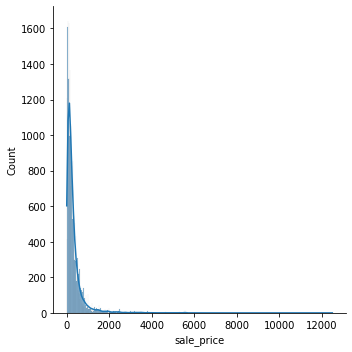

In [13]:
sns.displot(data=df, x='sale_price', kde=True)

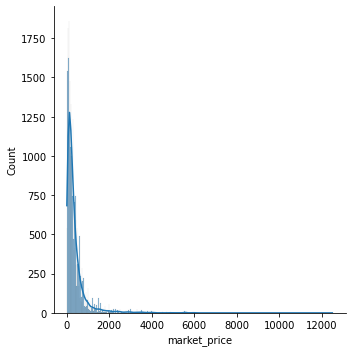

In [14]:
sns.displot(data=df, x='market_price', kde=True)

In [15]:
avg_df = df[['category', 'rating', 'market_price', 'sale_price']].groupby(['category']).mean().reset_index().sort_values('rating', ascending=False)
avg_df.head

<bound method NDFrame.head of                     category    rating  market_price  sale_price
3                  Beverages  4.044856    272.485294  239.973609
6   Foodgrains, Oil & Masala  4.040841    230.287318  193.281418
0                  Baby Care  4.008768    596.754098  534.946180
10    Snacks & Branded Foods  3.978426    140.856050  129.669068
8       Gourmet & World Food  3.964120    358.723316  320.109699
4       Cleaning & Household  3.954026    262.438245  226.477392
5          Eggs, Meat & Fish  3.943410    325.835486  288.897486
7        Fruits & Vegetables  3.943410     64.433662   50.889336
2           Beauty & Hygiene  3.935397    491.824967  416.950657
1      Bakery, Cakes & Dairy  3.918154    157.891765  142.842518
9     Kitchen, Garden & Pets  3.795548    663.517327  508.792629>

In [16]:
px.scatter(avg_df, x='category', y='rating', color='rating', title='')

In [17]:
px.scatter(avg_df, x='category', y='market_price', color='market_price', title='')

In [18]:
px.scatter(avg_df, x='category', y='sale_price', color='sale_price', title='')

In [19]:
px.histogram(df, x='category', color='sub_category', title='')

In [20]:
px.histogram(df, x='category', color='type', title='')

by dimas sadewo